In [55]:
# @title
from IPython.display import display, HTML

display(HTML("""
<script>
const firstCell = document.querySelector('.cell.code_cell');
if (firstCell) {
  firstCell.querySelector('.input').style.pointerEvents = 'none';
  firstCell.querySelector('.input').style.opacity = '0.5';
}
</script>
"""))

html = """
<div style="display:flex; flex-direction:column; align-items:center; text-align:center; gap:12px; padding:8px;">
  <h1 style="margin:0;">👋 Welcome to <span style="color:#1E88E5;">Algopath Coding Academy</span>!</h1>

  <img src="https://raw.githubusercontent.com/sshariqali/mnist_pretrained_model/main/algopath_logo.jpg"
       alt="Algopath Coding Academy Logo"
       width="400"
       style="border-radius:15px; box-shadow:0 4px 12px rgba(0,0,0,0.2); max-width:100%; height:auto;" />

  <p style="font-size:16px; margin:0;">
    <em>Empowering young minds to think creatively, code intelligently, and build the future with AI.</em>
  </p>
</div>
"""

display(HTML(html))

### **1. Problem Statement**

**Objective**
The goal is to develop a predictive model that accurately forecasts the performance index based on various predictors such as hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number os sample question papers practiced.

**Dataset**

| Column                       | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| **Hours_Studied**            | Number of hours spent studying per week.                                    |
| **Attendance**               | Percentage of classes attended.                                             |
| **Parental_Involvement**     | Level of parental involvement in the student's education (Low, Medium, High).|
| **Access_to_Resources**      | Availability of educational resources (Low, Medium, High).                  |
| **Extracurricular_Activities**| Participation in extracurricular activities (Yes, No).                      |
| **Sleep_Hours**              | Average number of hours of sleep per night.                                 |
| **Previous_Scores**          | Scores from previous exams.                                                 |
| **Motivation_Level**         | Student's level of motivation (Low, Medium, High).                          |
| **Internet_Access**          | Availability of internet access (Yes, No).                                  |
| **Tutoring_Sessions**        | Number of tutoring sessions attended per month.                             |
| **Family_Income**            | Family income level (Low, Medium, High).                                    |
| **Teacher_Quality**          | Quality of the teachers (Low, Medium, High).                                |
| **School_Type**              | Type of school attended (Public, Private).                                  |
| **Peer_Influence**           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| **Physical_Activity**        | Average number of hours of physical activity per week.                      |
| **Learning_Disabilities**    | Presence of learning disabilities (Yes, No).                                |
| **Parental_Education_Level** | Highest education level of parents (High School, College, Postgraduate).    |
| **Distance_from_Home**       | Distance from home to school (Near, Moderate, Far).                         |
| **Gender**                   | Gender of the student (Male, Female).                                       |

The target variable is:
- **Exam_Score:** Final exam score.

**Methodology**
To address this problem, we will create a `Simple Neural Network model` using `PyTorch` to implement `Multiple Linear Regression` for a Machine Learning.

**Tools**
- **NumPy:** A library for scientific computing, mainly involving linear algebra operations.
- **Pandas:** A library for data analysis and manipulation.
- **Matplotlib:** A library for plotting data.
- **PyTorch:** A library for flexibility and speed when building deep learning models.

---

In [21]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.9.0+cpu


In [2]:
# Check if CUDA is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

if device == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available, using CPU")

Using device: cpu
GPU not available, using CPU


### **2. Data Preprocessing**

Before we can use the dataset for building our predictive model, it's essential to preprocess the data. This ensures that our model interprets the data correctly and efficiently. Here are the key preprocessing steps we'll undertake:

<br>

**1. Converting Categorical Data to Numerical Data**

Our dataset includes categorical data (like `Yes`,`No` or `Low`, `Medium` and `High`). Machine learning models, however, work with numerical data. Thus, we will convert these responses into numerical values. For instance:
- `Yes` will be converted to `1`.
- `No` will be converted to `0`.

<br>

**2. Normalizing Feature Values**

Feature normalization is crucial in data preprocessing for machine learning models, especially when features vary widely in scale and units.

For instance, in our dataset, the `Previous_Scores` typically range from `50` to `100`, representing the scores students obtained in previous tests. In contrast, `Tutoring_Sessions` might range typically from `0` to `10`, reflecting how many practice tests a student has completed. If these features are used as-is, the model might inappropriately prioritize `Previous_Scores` over `Tutoring_Sessions` because of their larger numerical range.

Normalization adjusts the scale of features so they contribute equally to model training, enhancing the model's performance.

For this purpose we'll use **Z-score Normalization**, a common normalization method. It transforms each feature to have a mean (average) of 0 and a standard deviation of 1. This standardization process involves the following formula for each feature:

$$ X_{\text{norm}} = \frac{(X - \mu)}{\sigma} $$

Where:
- $ X $ is the original value of a feature.
- $ \mu $ is the mean of the feature.
- $ \sigma $ is the standard deviation of the feature.
- $ X_{\text{norm}} $ is the normalized value.

This method ensures that features with larger scales do not dominate those with smaller scales, leading to a more balanced and fair input to the model.


In [23]:
# Read the data from the CSV file
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [24]:
# Verifying the Datatypes and Checking for Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [25]:
# Get descriptive statistics for numerical columns
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [26]:
# Get descriptive statistics for categorical columns
data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [27]:
# Check if there are any missing values in the dataset
data.columns[data.isnull().any()]

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

In [28]:
# Fill missing values with the most recurring value (mode) for categorical columns
data.loc[:, 'Teacher_Quality'] = data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0])
data.loc[:, 'Parental_Education_Level'] = data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0])
data.loc[:, 'Distance_from_Home'] = data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0])

In [29]:
# Check if there are any missing values in the dataset
data.columns[data.isnull().any()].to_list()

[]

In [30]:
# Calculate the range of 'Exam_Score' (max - min)
max_score = data['Exam_Score'].max()
min_score = data['Exam_Score'].min()
score_range = max_score - min_score
print(f"Min Value of Exam Scores: {min_score}")
print(f"Max Value of Exam Scores: {max_score}")
print(f"Range of Exam Scores: {score_range}")

Min Value of Exam Scores: 55
Max Value of Exam Scores: 101
Range of Exam Scores: 46


Text(0.5, 1.0, 'Distribution of Exam Scores')

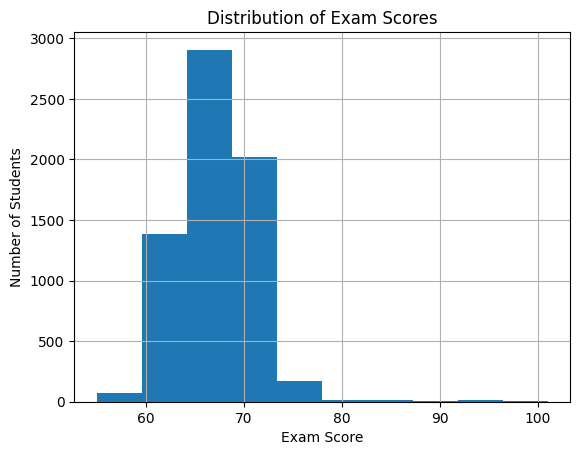

In [31]:
# Distribution of Exam Scores
data.Exam_Score.hist()
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Exam Scores")

In [32]:
# Identify columns with two unique values and whose datatype is object
binary_object_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]
print("Binary object columns:", binary_object_cols)

# Identify columns with more than two unique values whose datatype is object
multi_object_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]
print("Multi-class object columns:", multi_object_cols)

Binary object columns: ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']
Multi-class object columns: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']


<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*oU6w-wS25ySA4liGSESOHA.png" width="500"/>
</div>

- For **binary categorical columns** (those with only two unique values), we use **label encoding** (e.g., 'Yes' → 1, 'No' → 0). This is simple and efficient, and does not introduce any unintended ordinal relationship.

- For **multi-class categorical columns** (those with more than two unique values), we use **one-hot encoding**. This creates a new binary column for each category, ensuring the model does not assume any order or ranking among the categories.

Encoding categorical variables in this way ensures that the neural network can interpret the data correctly and avoids introducing bias or errors due to inappropriate numeric representations.


In [33]:
# Label encode binary categorical columns
for col in binary_object_cols:
    data[col] = data[col].map({data[col].unique()[0]: 0, data[col].unique()[1]: 1})

# One-hot encode multi-class categorical columns
data = pd.get_dummies(data, columns=multi_object_cols)

data.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,0,7,73,0,0,0,3,0,0,67,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True
1,19,64,0,8,59,0,2,0,4,0,1,61,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False
2,24,98,1,7,91,0,2,0,4,0,0,74,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True
3,29,89,1,8,98,0,1,0,4,0,0,71,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False
4,19,92,1,6,65,0,3,0,4,0,1,70,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True


In [35]:
# Normalizing Feature Values

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

    # Find the mean of each column/feature
    mu = np.mean(X, axis=0)                 # mu will have shape (n,)
    
    # Find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)                  # sigma will have shape (n,)

    # Element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm

In [36]:
for column in data.columns:
    if column != 'Exam_Score':
        data[column] = zscore_normalize_features(data[column])
data.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium,Family_Income_High,Family_Income_Low,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,0.504942,0.348375,-1.214685,-0.019796,-0.143800,-0.285825,-1.213934,-0.661006,0.031411,-0.342867,-0.855746,67,-0.637216,1.985362,-1.017868,1.531443,-0.498013,-1.004703,-0.499432,1.552722,-1.014484,-0.487575,1.213540,-0.822483,-0.646383,-0.332295,0.806543,-0.513117,-0.803479,1.226601,-0.656282,0.997128,-0.496118,-0.332576,-0.658407,0.819899
1,-0.162822,-1.383736,-1.214685,0.661399,-1.116110,-0.285825,0.411451,-0.661006,1.001199,-0.342867,1.168570,61,-0.637216,1.985362,-1.017868,-0.652979,-0.498013,0.995319,-0.499432,1.552722,-1.014484,-0.487575,-0.824035,1.215831,-0.646383,-0.332295,0.806543,1.948875,-0.803479,-0.815261,1.523735,-1.002880,-0.496118,-0.332576,1.518818,-1.219662
2,0.671882,1.560853,0.823259,-0.019796,1.106313,-0.285825,0.411451,-0.661006,1.001199,-0.342867,-0.855746,74,-0.637216,-0.503687,0.982446,-0.652979,-0.498013,0.995319,-0.499432,-0.644030,0.985723,-0.487575,-0.824035,1.215831,-0.646383,-0.332295,0.806543,-0.513117,1.244587,-0.815261,-0.656282,-1.002880,2.015648,-0.332576,-0.658407,0.819899
3,1.506587,0.781403,0.823259,0.661399,1.592469,-0.285825,-0.401242,-0.661006,1.001199,-0.342867,-0.855746,71,-0.637216,1.985362,-1.017868,-0.652979,-0.498013,0.995319,-0.499432,-0.644030,0.985723,-0.487575,-0.824035,1.215831,-0.646383,-0.332295,0.806543,1.948875,-0.803479,-0.815261,-0.656282,0.997128,-0.496118,-0.332576,1.518818,-1.219662
4,-0.162822,1.041220,0.823259,-0.700990,-0.699406,-0.285825,1.224144,-0.661006,1.001199,-0.342867,1.168570,70,-0.637216,-0.503687,0.982446,-0.652979,-0.498013,0.995319,-0.499432,-0.644030,0.985723,-0.487575,-0.824035,1.215831,1.547070,-0.332295,-1.239859,-0.513117,1.244587,-0.815261,1.523735,-1.002880,-0.496118,-0.332576,-0.658407,0.819899


### **3. What is Machine Learning and Why is this a Machine Learning Task?**

**What is Machine Learning?**

Machines can also learn just as humans and animals learn. To make a machine learn, we need to provide it with data and examples. The set of processes by which a machine can learn to do something on its own is called Machine Learning.

One such method is called the `Student-Teacher method (Supervised Learning)`: the machine (student) learns step-by-step from examples and guidance, just like a teacher training a dog. With practice and more data, the machine gets better at making decisions!

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1200/1*fq4smdRhVA2ZL6dxrikbKg.jpeg" width="500"/>
</div>

**Why is predicting exam scores a Machine Learning task?**

As described in the problem statement, our goal is to predict a student's exam score based on various factors such as hours studied, attendance, motivation, and more. This is a classic example of a supervised machine learning task: we have `historical data (examples)` where both the input features (student factors) and the output (exam score) are known. `By training a model on this data, the machine learns the relationship between the inputs and the output, enabling it to predict exam scores for new students based on their characteristics`. This process of learning from data and making predictions is the essence of machine learning.

### **4. Algorithm vs Model**

It's now time to understand the difference between an **algorithm** and a **model**:

|  | Algorithm | Model |
|--|-----------|-------|
| **Difference** | An **algorithm** is a set of rules or a procedure (like a recipe) that tells us how to learn from data. | A **model** is the result you get after applying an algorithm to your data. It contains the learned parameters (like weights and biases) that can be used to make predictions on new data. |
| **Why** | Multiple Linear Regression is an **algorithm** because it provides a step-by-step procedure for learning the relationship: $$y = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b$$ It uses mathematical rules (like minimizing the sum of squared errors) to find the best values for the parameters (weights $w$ and bias $b$). | **Simple Neural Network** is a **model** because it can apply the exact formula of MLR to our data and provide the learned parameters.. |

In this notebook, we use the Multiple Linear Regression algorithm to train a simple neural network model. 

### **5. What is a Neural Network?**

A **neural network** is inspired by how the human brain works. The simplest form of a neural network is called a **Perceptron**, which is the building block of more complex networks.

<div align="center">
  <img src="https://i.ytimg.com/vi/kft1AJ9WVDk/maxresdefault.jpg" width="500"/>
</div>

Looking at the diagram above, we can see how a perceptron works:

1. **Inputs ($x_1, x_2, x_3, ..., x_n$)**: These are our feature values (like hours studied, attendance, etc.)

2. **Synapses (Weights $w_1, w_2, w_3, ..., w_n$)**: Each input is multiplied by its corresponding weight. These weights determine how important each feature is.

3. **Neuron (Summation)**: The neuron adds up all the weighted inputs: 
   $$\sum_{i=1}^{n} x_i w_i = x_1w_1 + x_2w_2 + x_3w_3 + \cdots + x_nw_n$$

4. **Activation Function ($\phi$)**: For Multiple Linear Regression, we use an **identity activation function** (meaning $\phi(z) = z$), which simply passes the sum through unchanged.

5. **Output ($\hat{y}$)**: This gives us our prediction: 
   $$\hat{y} = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b$$

**This is exactly the Multiple Linear Regression equation!** A perceptron with an identity activation function is mathematically equivalent to Multiple Linear Regression. The perceptron learns the optimal weights ($w$) and bias ($b$) during training, just like the MLR algorithm does.

### **6. Implementing a Perceptron with PyTorch**

Now that we understand how a perceptron implements Multiple Linear Regression, let's build one using PyTorch's `torch.nn` module. We'll go through this step-by-step.

#### **Step 1: Prepare the Data (Split Features and Target)**

Before we can train our perceptron, we need to separate our dataset into:
- **Features (X)**: The input variables that we'll use to make predictions (all columns except `Exam_Score`)
- **Target (y)**: The output variable we want to predict (`Exam_Score`)

This separation is essential because the model learns the relationship between X and y.

In [37]:
# Separate features (X) and target (y)
X = data.drop('Exam_Score', axis=1)  # All columns except Exam_Score
y = data['Exam_Score']                # Only the Exam_Score column

print(f"Features shape: {X.shape}")   # (number of students, number of features)
print(f"Target shape: {y.shape}")     # (number of students,)
print(f"\nNumber of features (input size): {X.shape[1]}")

Features shape: (6607, 35)
Target shape: (6607,)

Number of features (input size): 35


#### **Step 2: Convert Data to PyTorch Tensors**

PyTorch works with **tensors**, which are similar to NumPy arrays but can run on GPUs for faster computation. We need to convert our pandas DataFrames to PyTorch tensors.

We use `torch.float32` because neural networks require floating-point numbers for gradient calculations during training.

In [38]:
# Convert pandas DataFrames to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)  # Reshape to column vector

print(f"X_tensor shape: {X_tensor.shape}")
print(f"y_tensor shape: {y_tensor.shape}")
print(f"\nX_tensor type: {type(X_tensor)}")
print(f"y_tensor type: {type(y_tensor)}")

X_tensor shape: torch.Size([6607, 35])
y_tensor shape: torch.Size([6607, 1])

X_tensor type: <class 'torch.Tensor'>
y_tensor type: <class 'torch.Tensor'>


#### **Step 3: Define the Perceptron Model**

Now we'll create our perceptron using PyTorch's `torch.nn.Linear` layer. This is a single linear layer that implements the equation:

$$\hat{y} = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b$$

**Key components:**
- `nn.Module`: The base class for all neural network modules in PyTorch
- `nn.Linear(input_size, output_size)`: Creates a linear transformation layer
  - `input_size`: Number of input features
  - `output_size`: Number of output values (1 for our single prediction)
- `forward()`: Defines how data flows through the model

In [49]:
# Define the Perceptron model
class Perceptron(torch.nn.Module):
    def __init__(self, input_size):
        """
        Initialize the perceptron
        
        Args:
            input_size: Number of input features
        """
        super(Perceptron, self).__init__()
        # Create a linear layer: y = wx + b
        # This automatically initializes random weights and bias
        self.linear = torch.nn.Linear(input_size, 1)
    
    def forward(self, x):
        """
        Forward pass: compute predictions
        
        Args:
            x: Input features
        
        Returns:
            predictions
        """
        return self.linear(x)

# Get the number of input features
input_size = X_tensor.shape[1]

# Create an instance of our Perceptron model
model = Perceptron(input_size)

print(f"Model architecture:\n{model}")
print(f"\nNumber of parameters: {sum(p.numel() for p in model.parameters())}")

Model architecture:
Perceptron(
  (linear): Linear(in_features=35, out_features=1, bias=True)
)

Number of parameters: 36


#### **Step 4: Define the Loss Function**

The **loss function** (also called cost function) measures how far our predictions are from the actual values. For regression problems, we use **Mean Squared Error (MSE)**:

$$\text{MSE} = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}_i - y_i)^2$$

Where:
- $m$ is the number of training examples
- $\hat{y}_i$ is the predicted value
- $y_i$ is the actual value

The lower the MSE, the better our model performs. During training, we try to minimize this loss.

In [50]:
# Define the loss function
criterion = torch.nn.MSELoss()

print(f"Loss function: {criterion}")

Loss function: MSELoss()


#### **Step 5: Define the Optimizer**

The **optimizer** is responsible for updating the model's weights and bias to minimize the loss. We'll use **Stochastic Gradient Descent (SGD)** (Recall), which adjusts parameters in the direction that reduces the loss:

$$w_{new} = w_{old} - \alpha \frac{\partial \text{Loss}}{\partial w}$$

Where:
- $\alpha$ is the **learning rate** (how big of a step we take in each update)
- $\frac{\partial \text{Loss}}{\partial w}$ is the gradient (direction to adjust weights)

**Learning rate** is crucial:
- Too high: The model may overshoot the optimal solution
- Too low: Training will be very slow

In [51]:
# Define the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f"Optimizer: {optimizer}")
print(f"Learning rate: {learning_rate}")

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning rate: 0.01


#### **Step 6: Train the Model**

Now we'll train our perceptron! The training process consists of repeating these steps for multiple **epochs** (complete passes through the dataset):

1. **Forward Pass**: Feed data through the model to get predictions
2. **Calculate Loss**: Measure how wrong the predictions are
3. **Backward Pass**: Calculate gradients (how to adjust weights)
4. **Update Weights**: Use the optimizer to adjust weights and bias

This is where the "learning" happens - the model gradually adjusts its weights to minimize the loss.

In [52]:
# Training loop
num_epochs = 1000
loss_history = []  # To track how loss changes over time

for epoch in range(num_epochs):
    # 1. Forward pass: compute predictions
    predictions = model(X_tensor)
    
    # 2. Calculate loss
    loss = criterion(predictions, y_tensor)
    
    # 3. Backward pass: compute gradients
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute new gradients
    
    # 4. Update weights
    optimizer.step()
    
    # Store loss for plotting
    loss_history.append(loss.item())
    
    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print(f"\nTraining complete!")
print(f"Final Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 87.3093
Epoch [200/1000], Loss: 5.5901
Epoch [300/1000], Loss: 4.1525
Epoch [400/1000], Loss: 4.1272
Epoch [500/1000], Loss: 4.1268
Epoch [600/1000], Loss: 4.1268
Epoch [700/1000], Loss: 4.1268
Epoch [800/1000], Loss: 4.1268
Epoch [900/1000], Loss: 4.1268
Epoch [1000/1000], Loss: 4.1268

Training complete!
Final Loss: 4.1268


#### **Step 7: Visualize Training Progress**

Let's plot how the loss decreased during training. A decreasing loss curve indicates that the model is learning successfully.

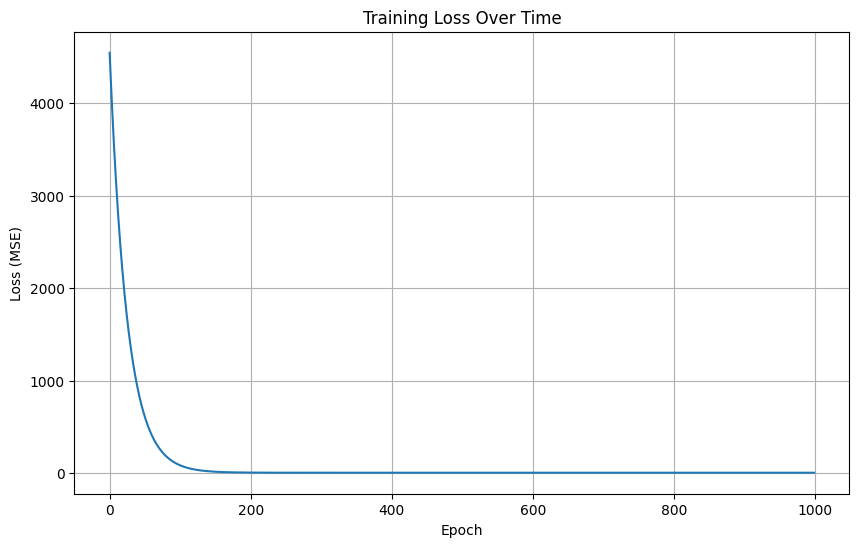

In [53]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()

#### **Step 8: Examine the Learned Parameters**

After training, our perceptron has learned the optimal weights and bias. Let's examine them to understand what the model learned about the importance of each feature.

In [54]:
# Get the learned weights and bias
weights = model.linear.weight.data.numpy().flatten()
bias = model.linear.bias.data.numpy()[0]

print(f"Bias (b): {bias:.4f}\n")
print(f"Weights shape: {weights.shape}")
print(f"\nTop 5 most important features (by absolute weight):")

# Create a DataFrame to show feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': weights
})
feature_importance['Abs_Weight'] = feature_importance['Weight'].abs()
feature_importance = feature_importance.sort_values('Abs_Weight', ascending=False)

print(feature_importance.head(10).to_string(index=False))

Bias (b): 67.2355

Weights shape: (35,)

Top 5 most important features (by absolute weight):
                  Feature    Weight  Abs_Weight
               Attendance  2.295941    2.295941
            Hours_Studied  1.767012    1.767012
          Previous_Scores  0.703224    0.703224
        Tutoring_Sessions  0.611411    0.611411
 Access_to_Resources_High  0.529542    0.529542
Parental_Involvement_High  0.492825    0.492825
 Parental_Involvement_Low -0.359790    0.359790
  Access_to_Resources_Low -0.358554    0.358554
       Family_Income_High  0.280122    0.280122
  Peer_Influence_Positive  0.279689    0.279689
